# Table of Contents
#### 1. Importing libraries and data
#### 2. The elbow technique
#### 3. k-means clustering

#### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#importing data
path = r'C:\Users\Goce\Desktop\11-2023 World Happiness Report 2015-2023'

In [3]:
# Importing Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df.csv'), index_col = False)

In [5]:
#dropping unnecessary columns
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [6]:
df.head(3)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,happiness_rank
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,High Happiness
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,High Happiness
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,High Happiness


In [7]:
df.shape

(1367, 11)

In [8]:
# Keep only the numerical variables
sub = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]


In [9]:
sub.head(3)

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357


### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Goce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[-2288.5298891716625,
 -907.2754915241732,
 -613.6037871054954,
 -471.5428033603034,
 -400.8622640252487,
 -367.9880997310669,
 -341.9539694940117,
 -318.51331822151997,
 -302.7433607525798]

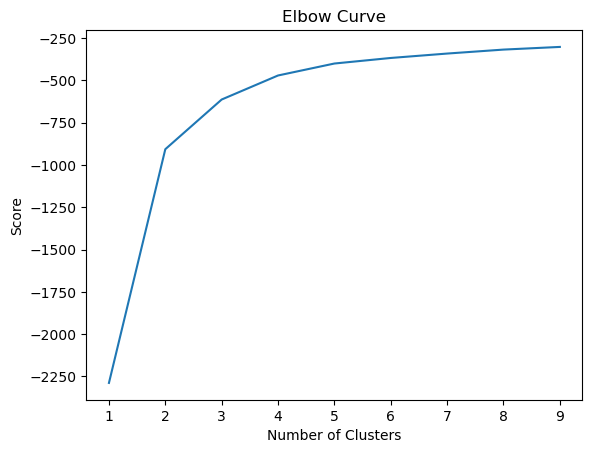

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from two to three on the X-axis and then increases slightly after three. That's why I believe that the optimal number of clusters is three.

#### 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [18]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=3)

In [19]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Goce\AppData\Local\Temp\ipykernel_6292\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [20]:
sub.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1


In [21]:
sub['clusters'].value_counts()

0    537
2    440
1    390
Name: clusters, dtype: int64

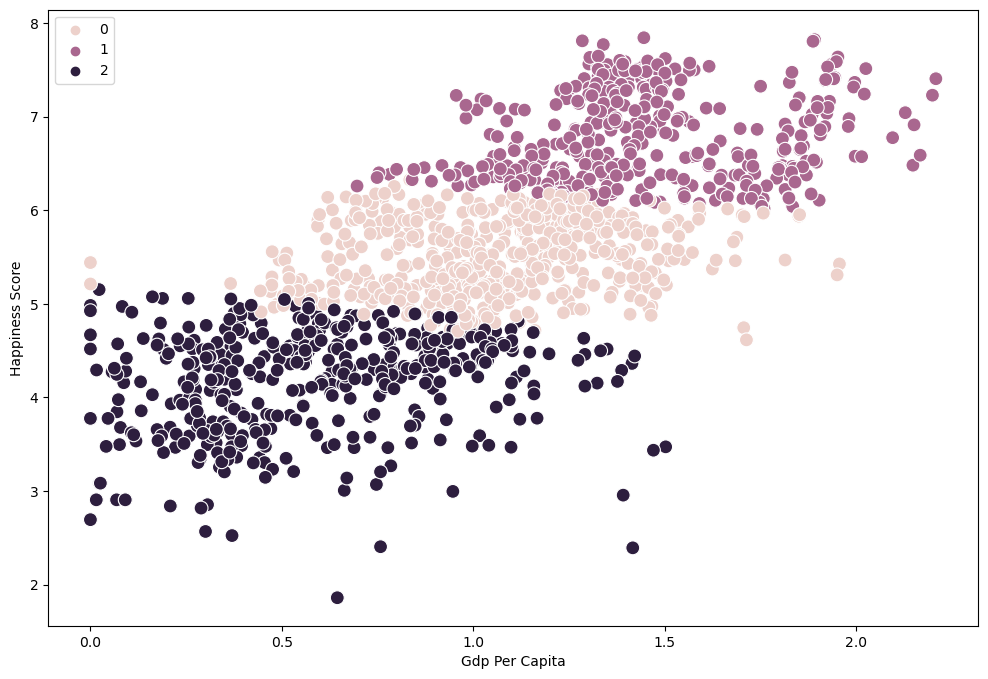

In [22]:
# Plot the clusters for the "happiness_score" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['gdp_per_capita'], y=sub['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, we are subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Gdp Per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

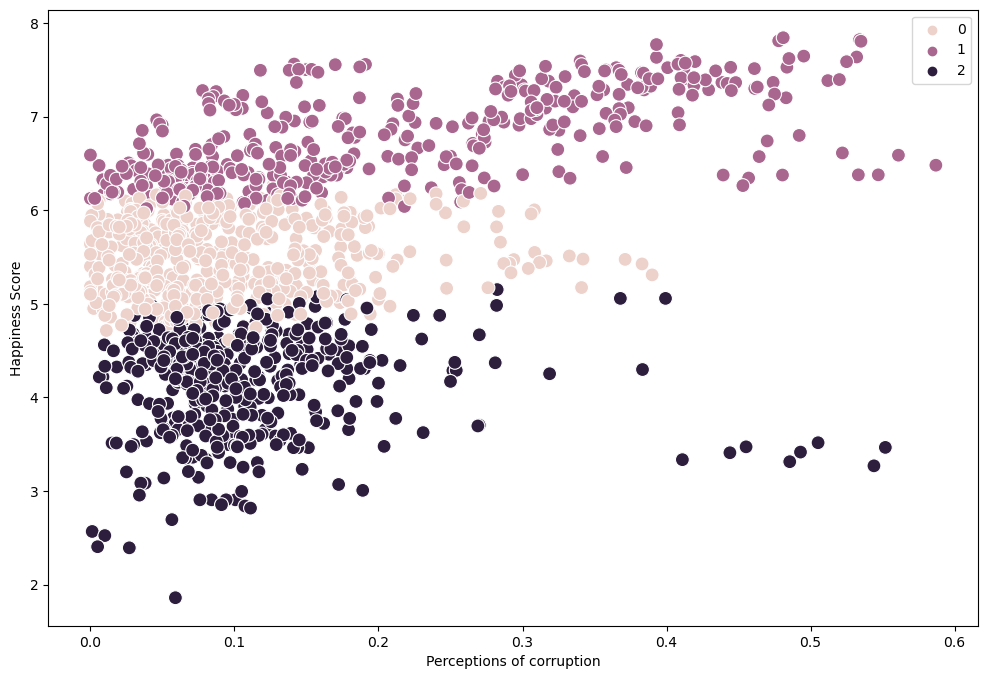

In [23]:
# Plot the clusters for the "happiness_score" and "perceptions_of_corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['perceptions_of_corruption'], y=sub['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, we are subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Perceptions of corruption') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

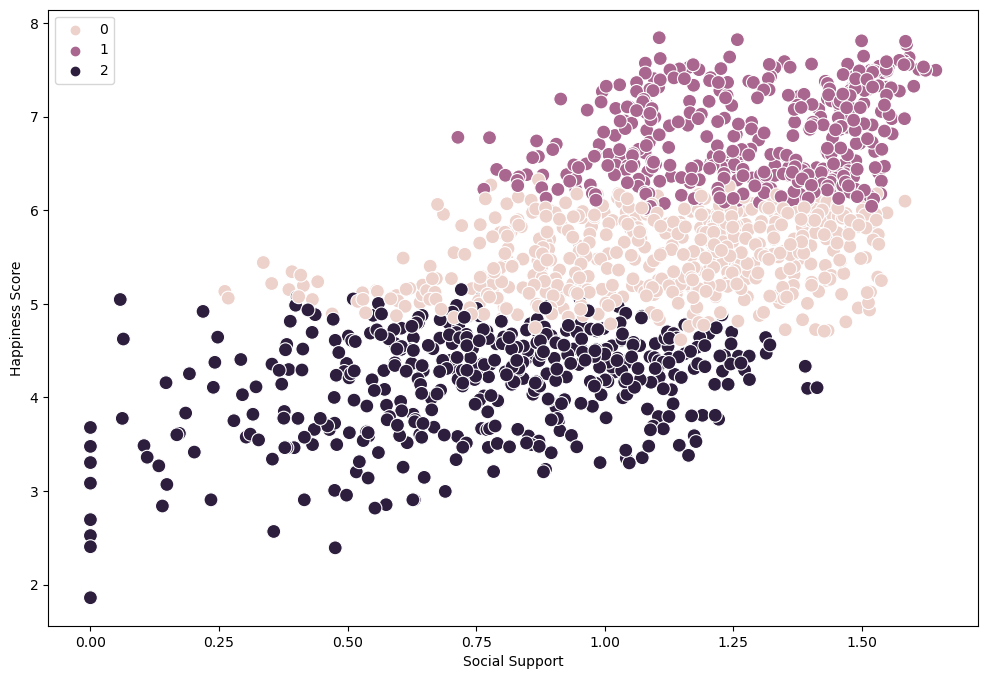

In [24]:
# Plot the clusters for the "happiness_score" and "social_support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['social_support'], y=sub['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, we are subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social Support') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

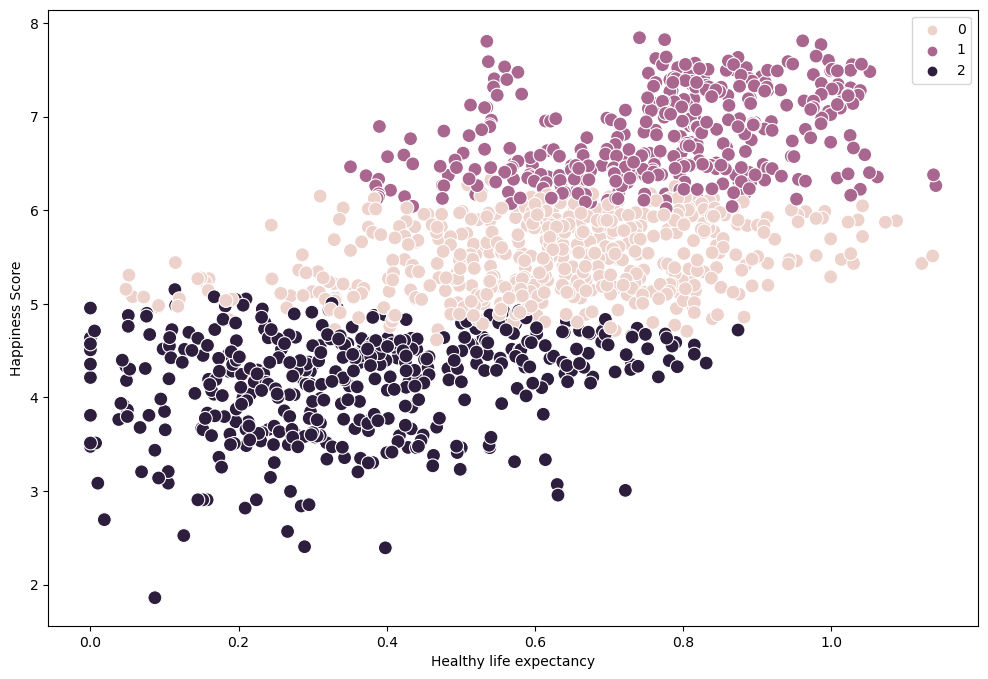

In [25]:
# Plot the clusters for the "healthy_life_expectancy" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['healthy_life_expectancy'], y=sub['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, we are subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Healthy life expectancy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

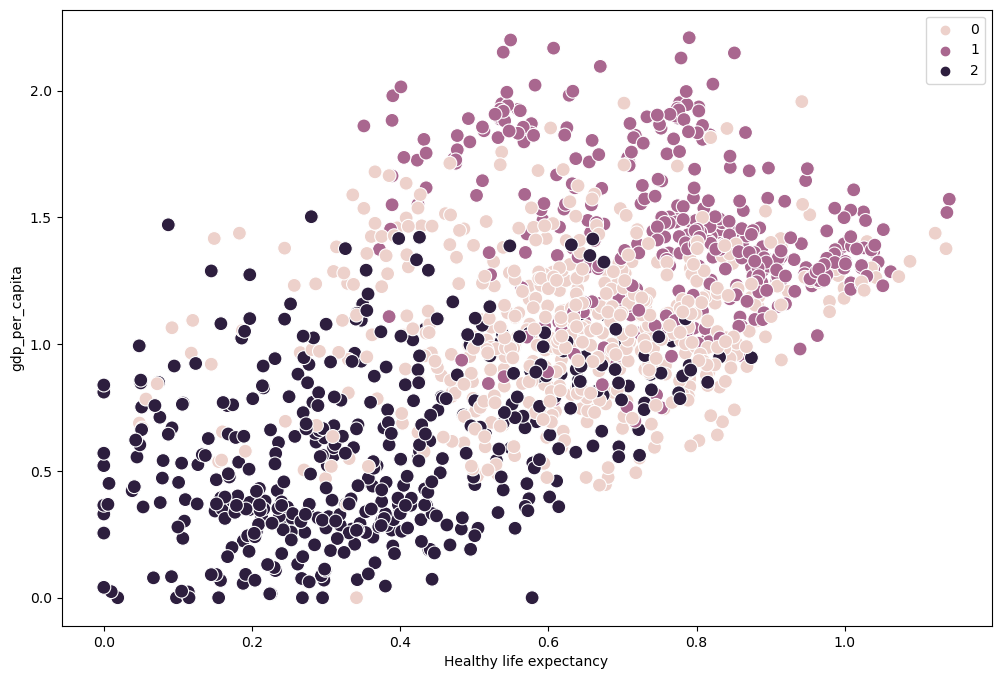

In [26]:
# Plot the clusters for the "healthy_life_expectancy" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['healthy_life_expectancy'], y=sub['gdp_per_capita'], hue=kmeans.labels_, s=100) 
# Here, we are subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Healthy life expectancy') # Label x-axis.
plt.ylabel('gdp_per_capita') # Label y-axis.
plt.show()

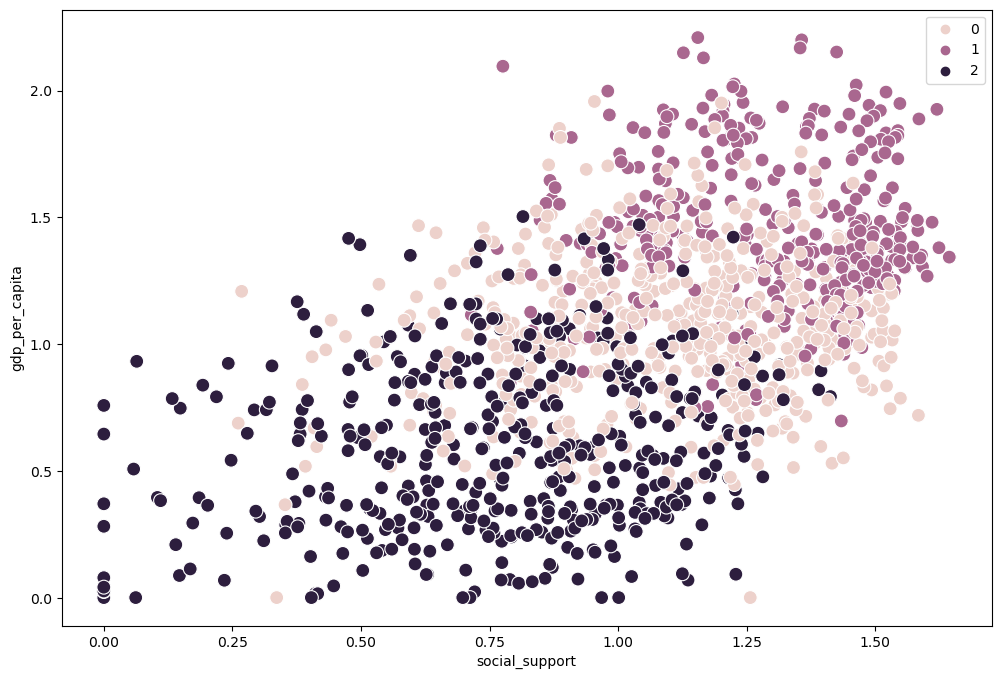

In [27]:
# Plot the clusters for the "social_support" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['social_support'], y=sub['gdp_per_capita'], hue=kmeans.labels_, s=100) 
# Here, we are subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('social_support') # Label x-axis.
plt.ylabel('gdp_per_capita') # Label y-axis.
plt.show()

Te findings suggest that the purple cluster generally has the highest levels of GDP per capita, social support, health, and happiness scores, followed by the pink cluster,while the dark purple cluster tends to have lower levels on these indicators. These clusters represent different levels of economic development and well-being, with the purple cluster being the most prosperous and happy, and the dark purple cluster being the least.

In [30]:
#Calculate the descriptive statistics 
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Goce\AppData\Local\Temp\ipykernel_6292\2100775586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [31]:
sub.groupby('cluster').agg({'happiness_score':['mean', 'median'], 
                         'gdp_per_capita':['mean', 'median'], 
                         'social_support':['mean', 'median'],
                          'healthy_life_expectancy':['mean', 'median'],
                           'freedom_to_make_life_choices':['mean', 'median'],
                            'generosity':['mean', 'median'],
                           'perceptions_of_corruption':['mean', 'median']})

happiness_score         gdp_per_capita           social_support  \
                       mean  median           mean    median           mean   
cluster                                                                       
dark purple        4.170087  4.2945       0.587221  0.560740       0.769571   
pink               5.509871  5.5104       1.061459  1.057000       1.097959   
purple             6.780323  6.6885       1.449153  1.402915       1.283992   

                      healthy_life_expectancy            \
               median                    mean    median   
cluster                                                   
dark purple  0.790462                0.360811  0.342866   
pink         1.142351                0.631451  0.638567   
purple       1.310200                0.770606  0.793275   

            freedom_to_make_life_choices           generosity            \
                                    mean    median       mean    median   
cluster                                                                   
dark purple                     0.360019  0.378728   0.207934  0.197135   
pink                            0.442466  0.457000   0.170684  0.150112   
purple                          0.564594  0.579630   0.218306  0.199179   

            perceptions_of_corruption            
                                 mean    median  
cluster                                          
dark purple                  0.108593  0.089141  
pink                         0.092237  0.074000  
purple                       0.214483  0.176500

In comparing the clusters, the Purple cluster stands out with the highest average happiness score, elevated economic prosperity (GDP per capita), and strong social support. It also demonstrates higher levels of health, freedom, and generosity. The Pink cluster follows with moderate scores across these indicators, while the Dark Purple cluster lags behind in terms of happiness, economic prosperity, and social well-being, featuring lower health, freedom and generosity.